In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Etapa 01-** Lendo o arquivo e inspecionando os dados

In [32]:
# Carregar o dataset
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

# Visualizar as primeiras linhas do dataset
print("Visualizando as primeiras linhas do dataset:")
display(df.head())

# Verificar estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df.describe())

# Verificar informações gerais sobre os tipos de dados
print("\nInformações sobre os tipos de dados:")
df.info()


Visualizando as primeiras linhas do dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom



Estatísticas descritivas:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



Informações sobre os tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **Etapa 02 -  Valores faltantes na identificação do cliente**

Com base nos dados:

A coluna CustomerID tem 135.080 valores nulos (541.909 - 406.829).

A coluna Description tem 1.454 valores nulos

In [33]:
# Verificando a quantidade de valores nulos
print("Valores nulos por coluna:")
print(df.isna().sum())

# Removendo linhas onde o CustomerID é nulo
df = df.dropna(subset=['CustomerID'])

# Substituindo valores nulos na coluna Description por 'Descrição Indisponível'
df['Description'] = df['Description'].fillna('Descrição Indisponível')

# Confirmando se os nulos foram removidos
print("\nApós a limpeza, valores nulos restantes:")
print(df.isna().sum())

Valores nulos por coluna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Após a limpeza, valores nulos restantes:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# **Etapa 03- Preços unitários e quantidade de produtos iguais ou inferior a 0**

In [34]:
# Verificando a quantidade de valores inválidos
preco_invalido = df[df['UnitPrice'] <= 0]
quantidade_invalida = df[df['Quantity'] <= 0]

print(f"Registros com preço inválido: {len(preco_invalido)}")
print(f"Registros com quantidade inválida: {len(quantidade_invalida)}")

# Removendo os registros inválidos
df = df[df['UnitPrice'] > 0]
df = df[df['Quantity'] > 0]

# Confirmando a limpeza
print("\nApós a remoção, dados restantes:")
print(df.describe())



Registros com preço inválido: 40
Registros com quantidade inválida: 8905

Após a remoção, dados restantes:
            Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


# **Etapa 04 - Verificando se existem linhas duplicadas**

In [35]:
# Verificando as duplicatas
duplicatas = df[df.duplicated()]

print(f"Registros duplicados encontrados: {len(duplicatas)}")

# Removendo as duplicatas
df = df.drop_duplicates()

# Confirmando a remoção
print("\nApós a remoção das duplicatas, dados restantes:")
print(df.describe())


Registros duplicados encontrados: 5192

Após a remoção das duplicatas, dados restantes:
            Quantity      UnitPrice     CustomerID
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914   15287.843865
std       180.492832      22.241836    1713.539549
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000


# **Etapa 05 - Tipos de dados da coluna**

In [36]:
# Tentando a conversão de 'InvoiceDate' com dayfirst=True para lidar com os diferentes formatos
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')

# Verificando os tipos após a alteração
print("\nTipos de dados após correção:")
print(df.dtypes)



Tipos de dados após correção:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


<ipython-input-36-3437cf9b2969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')


# **Etapa 06 - Tratando os outliers**

In [37]:
# Remover outliers onde Quantity > 10.000 e UnitPrice > 5.000
df_cleaned = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

# Verificar as primeiras linhas após a remoção dos outliers
df_cleaned.head()

# Verificar o número de registros após o filtro
print(f"Número de registros após a remoção dos outliers: {df_cleaned.shape[0]}")


Número de registros após a remoção dos outliers: 392689


# **Etapa 07 - Coluna adicional**

In [43]:
# Criar a coluna 'TotalPrice' com o preço total da compra (Quantity * UnitPrice)
df_cleaned.loc[:, 'TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Visualizar as primeiras linhas para confirmar
df_cleaned.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01


# **Etapa 08 -  Última data**

In [45]:
# Certificar que a coluna InvoiceDate está no formato de data
df_cleaned.loc[:, 'InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Calcular a última data de compra
last_purchase_date = df_cleaned['InvoiceDate'].max()

# Exibir a última data de compra
print(f"A última data de compra foi: {last_purchase_date}")


A última data de compra foi: 2011-12-10 17:19:00


# **Etapa 09 - Gráficos**




<ipython-input-40-a862fce7aecc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')  # Extraindo o ano e o mês
<ipython-input-40-a862fce7aecc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


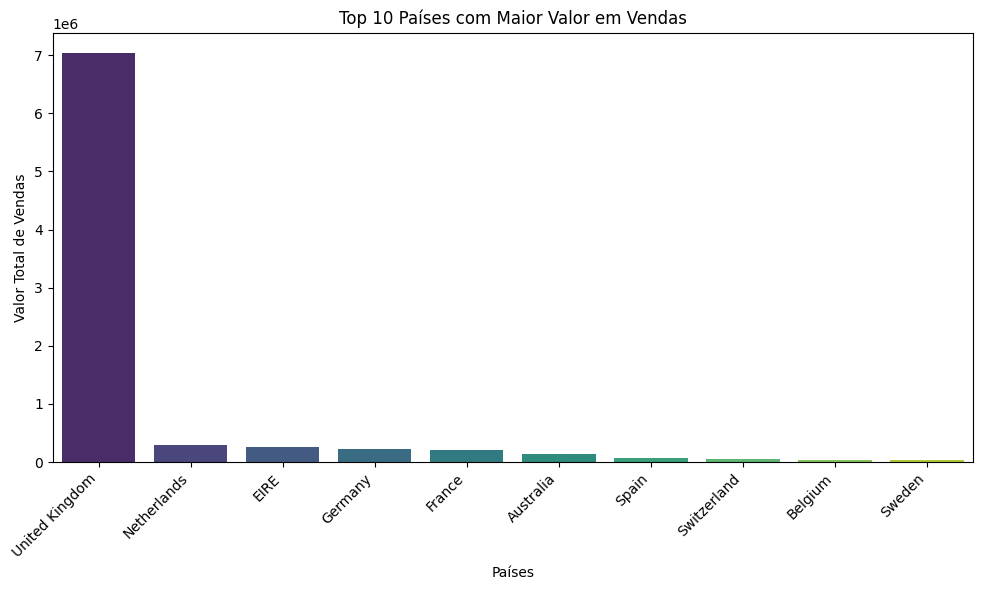

<ipython-input-40-a862fce7aecc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')


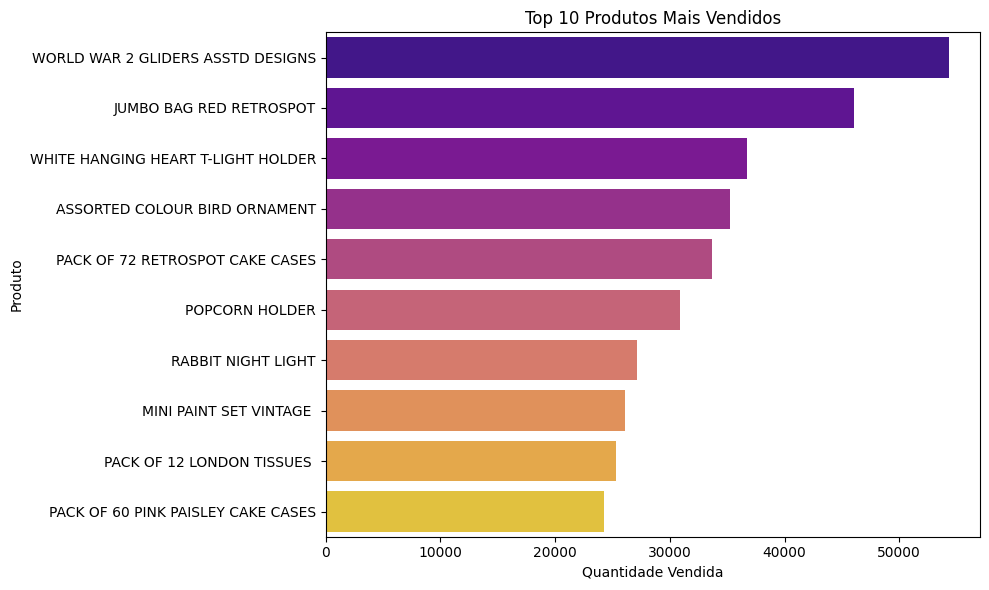

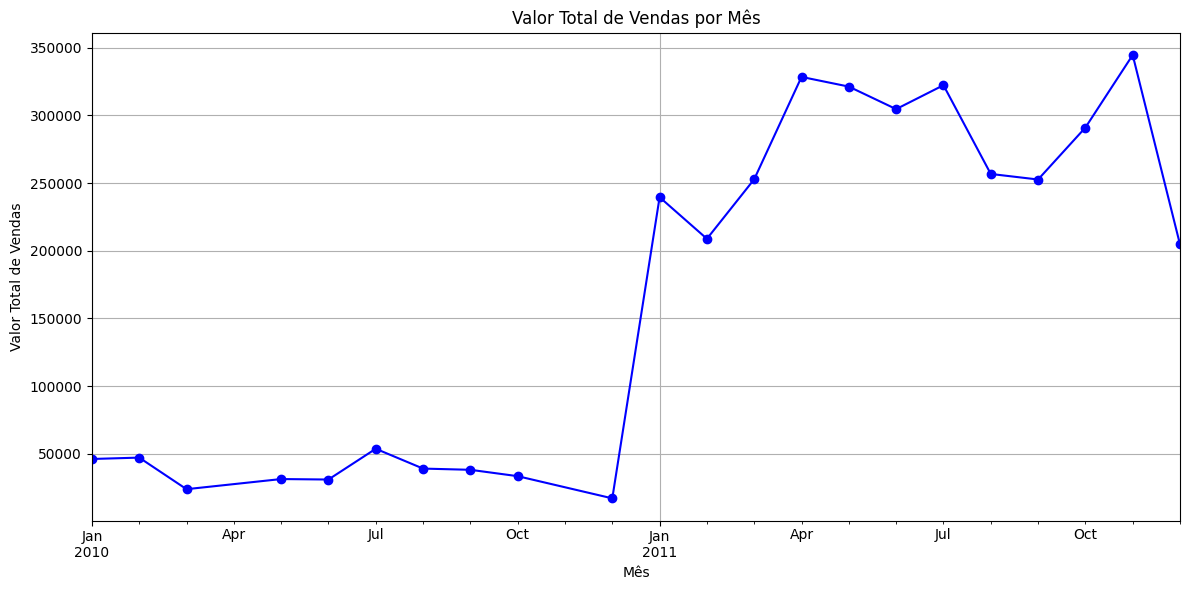

<Figure size 1200x600 with 0 Axes>

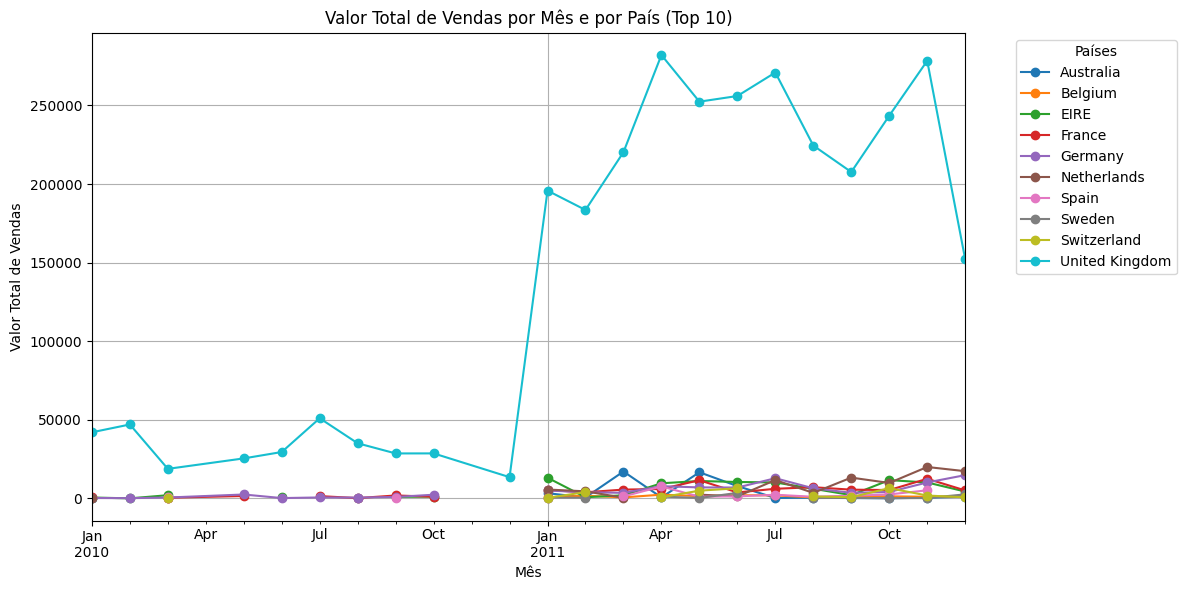

In [40]:
# 1. Top 10 países com maior valor em vendas
top_countries = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# 2. Top 10 produtos mais vendidos
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# 3. Valor de venda total por mês
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')  # Extraindo o ano e o mês
sales_by_month = df_cleaned.groupby('YearMonth')['TotalPrice'].sum()

# 4. Valor de venda total por mês e por país (considerando os 10 países com maior venda)
top_10_countries = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).index
sales_by_month_country = df_cleaned[df_cleaned['Country'].isin(top_10_countries)].groupby(['YearMonth', 'Country'])['TotalPrice'].sum().unstack()

# Plotando os gráficos

# Gráfico 1: Top 10 países com maior valor em vendas
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Países')
plt.ylabel('Valor Total de Vendas')
plt.tight_layout()
plt.show()

# Gráfico 2: Top 10 produtos mais vendidos
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

# Gráfico 3: Valor de venda total por mês
plt.figure(figsize=(12,6))
sales_by_month.plot(kind='line', marker='o', color='b')
plt.title('Valor Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 4: Valor de venda total por mês e por país (considerando os 10 principais países)
plt.figure(figsize=(12,6))
sales_by_month_country.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Valor Total de Vendas por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Etapa 10 -   RFM**

Recência (R): Subtrair a última data de compra do cliente da última data de compra no dataset.


Frequência (F): Contar o número de compras feitas por cada cliente.


Monetário (M): Calcular a média dos preços totais (Ticket Médio) das compras de cada cliente.

In [46]:
# Certificar que a coluna InvoiceDate está no formato de data
df_cleaned.loc[:, 'InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])  # Garantir que a coluna de data está no formato correto

# Preço total por pedido
df_cleaned.loc[:, 'TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']  # Calculando o preço total

# Agrupar por cliente e pedido
df_customer_orders = df_cleaned.groupby(['CustomerID', 'InvoiceNo']).agg(
    LastPurchaseDate=('InvoiceDate', 'max'),
    TotalPurchaseValue=('TotalPrice', 'sum')
).reset_index()

# Calcular a última data de compra
last_purchase_date = df_cleaned['InvoiceDate'].max()  # Última data de compra no dataset

# Calcular Recência (R), Frequência (F) e Monetário (M)
rfm = df_customer_orders.groupby('CustomerID').agg(
    Recency=('LastPurchaseDate', lambda x: (last_purchase_date - x.max()).days),
    Frequency=('InvoiceNo', 'count'),
    Monetary=('TotalPurchaseValue', 'mean')
).reset_index()

# Exibir o resultado do RFM
print(rfm.head())



   CustomerID  Recency  Frequency     Monetary
0     12347.0     95.0          7   615.714286
1     12348.0    220.0          4   449.310000
2     12349.0      NaN          1  1757.550000
3     12350.0    311.0          1   334.400000
4     12352.0    274.0          8   313.255000
